In [1]:
import pandas as pd

### company balance sheets

In [2]:
file_path = 'train.csv'  
new_df = pd.read_csv(file_path, index_col=0)
new_df.head()

,id,stmt_date,HQ_city,legal_struct,ateco_sector,def_date,fs_year,asst_intang_fixed,asst_tang_fixed,asst_fixed_fin,...,inc_extraord,taxes,profit,days_rec,ebitda,roa,roe,wc_net,margin_fin,cf_operations
17,520288,2011-12-31,28.0,SRL,14.0,NaT,2011,67537.0,1137566.0,1908.0,...,-309.0,-80959.0,-81288.0,NaN,6318.0,-3.81,-28.03,496258.0,-917029.0,-849.0
18,520288,2008-12-31,28.0,SRL,14.0,NaT,2008,256438.0,1181416.0,860.0,...,-678.0,-94622.0,-107382.0,NaN,46088.0,-2.76,NaN,97952.0,NaN,-3881.0
19,520288,2009-12-31,28.0,SRL,14.0,NaT,2009,194046.0,1152014.0,860.0,...,4224.0,-74235.0,-77819.0,NaN,67611.0,-2.17,NaN,-210671.0,NaN,32618.0
21,520288,2012-12-31,28.0,SRL,14.0,NaT,2012,15195.0,1116938.0,2023.0,...,3634.0,-250786.0,-250786.0,NaN,-161478.0,-12.99,NaN,367892.0,-1094962.0,-168907.0
22,520288,2007-12-31,28.0,SRL,14.0,NaT,2007,126603.0,1127807.0,620.0,...,820.0,92192.0,36733.0,NaN,153060.0,6.20,52.43,-317007.0,-1184970.0,80039.0


In [3]:
left_side_balance = [
    'asst_intang_fixed',
    'asst_tang_fixed',
    'asst_fixed_fin',
    'asst_current',
    'AR',
    'cash_and_equiv',
    'asst_tot',
    'goodwill'
]

In [4]:
right_side_balance = [
    'liab_lt',
    'liab_lt_emp', 
    'debt_bank_st',
    'debt_bank_lt',
    'debt_fin_st',
    'debt_fin_lt',
    'AP_st',
    'AP_lt',
    'debt_st',
    'debt_lt',
    'eqty_tot',
    'eqty_corp_family_tot',
]

In [5]:
good_example = new_df.loc[[786008]]

In [8]:
good_example['asst_tot'] 

786008    2320949.0
Name: asst_tot, dtype: float64

In [9]:
good_example[['asst_intang_fixed',
    'asst_tang_fixed',
    'asst_fixed_fin',
    'asst_current',
    # 'AR',
    # 'cash_and_equiv',
             ]].sum(axis=1)

786008    2320949.0
dtype: float64

In [17]:
good_example['asst_current']

786008    2181677.0
Name: asst_current, dtype: float64

In [18]:
good_example[['AR','cash_and_equiv']].sum(axis=1)

786008    2181677.0
dtype: float64

In [19]:
asset_cols = ['asst_intang_fixed',
    'asst_tang_fixed',
    'asst_fixed_fin',
    'AR',
    'cash_and_equiv',
             'goodwill']

# must be equal to 'asst_tot'

In [20]:
### left side total

ex_left_total = good_example[asset_cols].sum(axis=1)
ex_left_total

786008    2376869.0
dtype: float64

In [21]:
### right side

In [22]:
ex_right_total = good_example[['liab_lt',
    'liab_lt_emp', 
    'debt_bank_st',
    'debt_bank_lt',
    'debt_fin_st',
    'debt_fin_lt',
    'AP_st',
    'AP_lt',
    
    'eqty_tot',
    'eqty_corp_family_tot',
                               # 'debt_st',
    # 'debt_lt',
             ]].sum(axis=1)
ex_right_total

786008    2252557.0
dtype: float64

In [40]:
import seaborn as sns
sns.set()

In [54]:
viz_data = good_example[['liab_lt',
    'liab_lt_emp', 
    'debt_bank_st',
    'debt_bank_lt',
    'debt_fin_st',
    'debt_fin_lt',
    'AP_st',
    'AP_lt',
    
    'eqty_tot',
    'eqty_corp_family_tot',
                               'debt_st',
    'debt_lt',
                         'asst_tot'
             ]]

In [55]:
import matplotlib.pyplot as plt


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'liab_lt'),
  Text(1, 0, 'liab_lt_emp'),
  Text(2, 0, 'debt_bank_st'),
  Text(3, 0, 'debt_bank_lt'),
  Text(4, 0, 'debt_fin_st'),
  Text(5, 0, 'debt_fin_lt'),
  Text(6, 0, 'AP_st'),
  Text(7, 0, 'AP_lt'),
  Text(8, 0, 'eqty_tot'),
  Text(9, 0, 'eqty_corp_family_tot'),
  Text(10, 0, 'debt_st'),
  Text(11, 0, 'debt_lt'),
  Text(12, 0, 'asst_tot')])

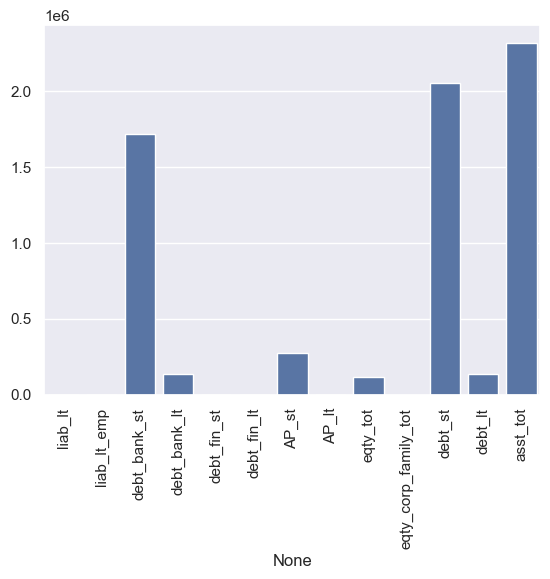

In [56]:
sns.barplot(x=viz_data.T.index, y=viz_data.values[0])
plt.xticks(rotation=90)

In [58]:
viz_data['asst_tot']

786008    2320949.0
Name: asst_tot, dtype: float64

In [59]:
viz_data['debt_st']

786008    2056353.0
Name: debt_st, dtype: float64

In [60]:
viz_data['asst_tot'].values[0]- viz_data['debt_st'].values[0]

np.float64(264596.0)

In [63]:
viz_data[['AP_st','debt_st']].sum(axis=1)

786008    2333684.0
dtype: float64

In [24]:
good_example['debt_st']

786008    2056353.0
Name: debt_st, dtype: float64

In [66]:
df = new_df.copy()

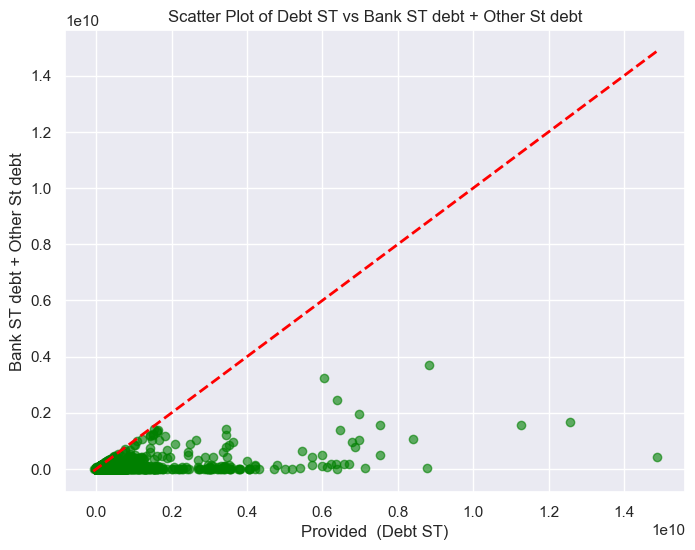

avg pct diff: inf


In [68]:
df['debt_st_calc'] = df['debt_fin_st'] + df['debt_bank_st'] 

# Create a scatter plot comparing total assets to liabilities + equity
plt.figure(figsize=(8, 6))
plt.scatter(df['debt_st'], df['debt_st_calc'], color='green', alpha=0.6)
plt.plot([df['debt_st'].min(), df['debt_st'].max()], [df['debt_st'].min(), df['debt_st'].max()], color='red', lw=2, linestyle='--')  # Line of equality
plt.title('Scatter Plot of Debt ST vs Bank ST debt + Other St debt')
plt.xlabel('Provided  (Debt ST)')
plt.ylabel('Bank ST debt + Other St debt')
plt.grid(True)

# Display the plot
plt.show()

# Calculate percent difference
percent_difference_liabilities_equity = (df['debt_st'] - df['debt_st_calc']).abs() / df['debt_st'] * 100

# Calculate the average percent difference
average_percent_difference_liabilities_equity = percent_difference_liabilities_equity.mean()
print('avg pct diff:', average_percent_difference_liabilities_equity)


In [25]:
good_example[['debt_bank_st','debt_fin_st','AP_st']].sum(axis=1)

786008    1997564.0
dtype: float64

In [26]:
2056353.0-1997564.0

58789.0

In [27]:
good_example[['debt_bank_lt','debt_fin_lt','AP_lt']].sum(axis=1)

786008    136961.0
dtype: float64

In [28]:
good_example['debt_lt']

786008    136961.0
Name: debt_lt, dtype: float64

In [29]:
good_example[right_side_balance]

,liab_lt,liab_lt_emp,debt_bank_st,debt_bank_lt,debt_fin_st,debt_fin_lt,AP_st,AP_lt,debt_st,debt_lt,eqty_tot,eqty_corp_family_tot
786008,0.0,0.0,1720233.0,136961.0,0.0,0.0,277331.0,0.0,2056353.0,136961.0,118032.0,NaN


In [30]:
good_example[left_side_balance]

,asst_intang_fixed,asst_tang_fixed,asst_fixed_fin,asst_current,AR,cash_and_equiv,asst_tot,goodwill
786008,3849.0,92253.0,43170.0,2181677.0,2180436.0,1241.0,2320949.0,55920.0


In [31]:
good_example[['debt_lt','debt_st','AP_lt','AP_st']].sum(axis=1)

786008    2470645.0
dtype: float64

In [32]:
good_example[['asst_tot']].sum(axis=1)

786008    2320949.0
dtype: float64

In [33]:
good_example[good_example.select_dtypes(['int','float']).columns[(good_example.select_dtypes(['int','float']) <= 58789.0).values[0]]].T

,786008
HQ_city,15.00
ateco_sector,68.00
fs_year,2009.00
asst_intang_fixed,3849.00
asst_fixed_fin,43170.00
cash_and_equiv,1241.00
liab_lt,0.00
liab_lt_emp,0.00
debt_fin_st,0.00
debt_fin_lt,0.00
